In [3]:
import torch
import numpy as np

In [2]:
np_data = np.arange(6).reshape(2,3)

In [3]:
torch_data = torch.from_numpy(np_data) # turn a torch data into a numpy data

In [4]:
torch2array = torch_data.numpy() # turn torch to numpy

## absolute function in torch

In [5]:
data = [-1, -1]
torch_tensor = torch.FloatTensor(data) # turn data into a torch tensor
torch_abs = torch.abs(torch_tensor)
torch_sin = torch.sin(torch_tensor)

## matmul

In [6]:
np_data = np.arange(4).reshape(2,2)
torch_data = torch.FloatTensor(np_data)

In [7]:
print(np.matmul(np_data, np_data))
print(torch.mm(torch_data, torch_data))

[[ 2  3]
 [ 6 11]]
tensor([[  2.,   3.],
        [  6.,  11.]])


## Variable

In [4]:
from torch.autograd import Variable

In [38]:
torch_data = torch.FloatTensor([[1,2],[3,4]])
torch_variable = Variable(torch_data, requires_grad=True)

In [39]:
print(torch_data)
print(torch_variable)

tensor([[ 1.,  2.],
        [ 3.,  4.]])
tensor([[ 1.,  2.],
        [ 3.,  4.]])


In [40]:
v_mean = torch.mean(torch.mm(torch_variable, torch_variable))
t_mean = torch.mean(torch_data*torch_data)

In [41]:
v_mean.backward()

In [45]:
print(torch_variable.grad)
print(v_mean.data)

tensor([[ 1.7500,  2.7500],
        [ 2.2500,  3.2500]])
tensor(13.5000)


In [5]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [47]:
x = torch.linspace(-5, 5, 500)
x = Variable(x)
x_np = x.data.numpy()

In [48]:
y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

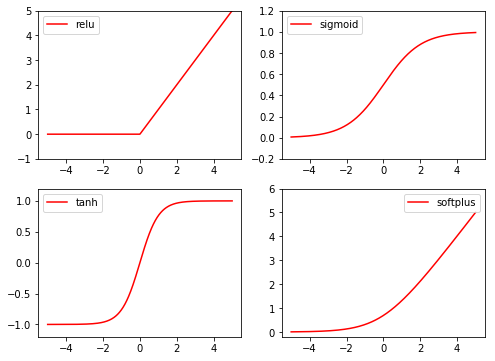

In [52]:
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()


## regression

In [24]:
x = torch.unsqueeze(torch.linspace(-2, 2, 200), dim=1)
y = x.pow(2) + 2*x + 0.1*torch.rand(x.size())

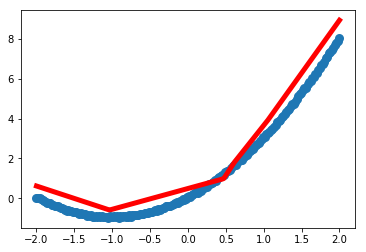

In [25]:
class Regression(torch.nn.Module):
    def __init__(self, input_units, hidden_units, output_units):
        super().__init__()
        self.hidden = torch.nn.Linear(input_units, hidden_units)
        self.predict = torch.nn.Linear(hidden_units, output_units)
    
    def forward(self, x):
        z1 = self.hidden(x)
        a1 = F.relu(z1)
        y = self.predict(a1)
        return y
    
reg1 = Regression(1, 10, 1)
optimizer = torch.optim.SGD(reg1.parameters(), lr=0.2)
plt.ion()
plt.show()
for i in range(1000):
    predictions = reg1(x)
    loss = torch.nn.MSELoss()(predictions, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
plt.cla()
plt.scatter(x.data.numpy(), y.data.numpy(), lw=3)
plt.plot(x.data.numpy(), predictions.data.numpy(), 'r-', lw=5)
plt.show()

## classification

In [42]:
data = torch.ones(100, 2)
x1 = torch.normal(2 * data, 1)
x2 = torch.normal(-2 * data, 1)
y1 = torch.ones(100)
y2 = torch.zeros(100)
x = torch.cat((x1, x2),).type(torch.FloatTensor)
y = torch.cat((y1, y2)).type(torch.LongTensor)

In [47]:
class Classification(torch.nn.Module):
    def __init__(self, input_units, hidden_units, output_units):
        super().__init__()
        self.hidden = torch.nn.Linear(input_units, hidden_units)
        self.predict = torch.nn.Linear(hidden_units, output_units)
    
    def forward(self, x):
        z1 = self.hidden(x)
        a1 = F.relu(z1)
        y = self.predict(a1)
        return y
clas1 = Classification(2, 20, 2)
optimizer = torch.optim.SGD(clas1.parameters(), lr=0.1)
loss_func = torch.nn.CrossEntropyLoss()
for i in range(100):
    out = clas1(x)
    loss = loss_func(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [49]:
prediction = torch.max(F.softmax(out), 1)[1] # the [0] indexing is the value and the [1] is the position

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


In [51]:
acc = torch.sum(prediction == y)/200

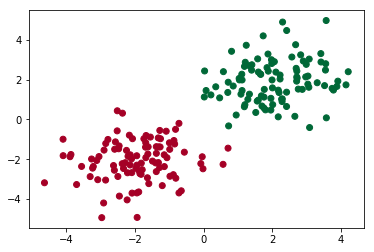

In [57]:
plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1],c=prediction,cmap='RdYlGn')

### nn.Sequential

In [61]:
nets1 = torch.nn.Sequential(torch.nn.Linear(2, 10),
                          torch.nn.ReLU(),
                          torch.nn.Linear(10, 2))

In [62]:
print(clas1)
print(nets1)

Classification(
  (hidden): Linear(in_features=2, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=2, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


## save model

In [66]:
torch.save(clas1, 'clas1_model.pkl')
torch.save(clas1.state_dict(), 'clas1_params.pkl') # load parameters only if the net is very big

/root/anaconda3/lib/python3.6/site-packages/torch/serialization.py:193: UserWarning: Couldn't retrieve source code for container of type Classification. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [67]:
nets2 = torch.load('clas1_model.pkl')

In [72]:
net3 = Classification(2, 10, 2)
net3.load_state_dict(torch.load('clas1_params.pkl'))

RuntimeError: Error(s) in loading state_dict for Classification:
	While copying the parameter named "hidden.weight", whose dimensions in the model are torch.Size([10, 2]) and whose dimensions in the checkpoint are torch.Size([20, 2]).
	While copying the parameter named "hidden.bias", whose dimensions in the model are torch.Size([10]) and whose dimensions in the checkpoint are torch.Size([20]).
	While copying the parameter named "predict.weight", whose dimensions in the model are torch.Size([2, 10]) and whose dimensions in the checkpoint are torch.Size([2, 20]).

## batch training and dataloader

In [6]:
import torch.utils.data as Data

In [83]:
## fake some data
x = torch.ones(1000, 100, 100)
y = torch.zeros(1000, 1)
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(torch_dataset, shuffle=True, batch_size=100, num_workers=2)

In [92]:
for epoch in range(3):
    for step, (batch_x, batch_y) in enumerate(loader):
        ## ... training ..
        print(print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
              batch_x.numpy().shape, '| batch y: ', batch_y.numpy().shape))

Epoch:  0 | Step:  0 | batch x:  (100, 100, 100) | batch y:  (100, 1)
None
Epoch:  0 | Step:  1 | batch x:  (100, 100, 100) | batch y:  (100, 1)
None
Epoch:  0 | Step:  2 | batch x:  (100, 100, 100) | batch y:  (100, 1)
None
Epoch:  0 | Step:  3 | batch x:  (100, 100, 100) | batch y:  (100, 1)
None
Epoch:  0 | Step:  4 | batch x:  (100, 100, 100) | batch y:  (100, 1)
None
Epoch:  0 | Step:  5 | batch x:  (100, 100, 100) | batch y:  (100, 1)
None
Epoch:  0 | Step:  6 | batch x:  (100, 100, 100) | batch y:  (100, 1)
None
Epoch:  0 | Step:  7 | batch x:  (100, 100, 100) | batch y:  (100, 1)
None
Epoch:  0 | Step:  8 | batch x:  (100, 100, 100) | batch y:  (100, 1)
None
Epoch:  0 | Step:  9 | batch x:  (100, 100, 100) | batch y:  (100, 1)
None
Epoch:  1 | Step:  0 | batch x:  (100, 100, 100) | batch y:  (100, 1)
None
Epoch:  1 | Step:  1 | batch x:  (100, 100, 100) | batch y:  (100, 1)
None
Epoch:  1 | Step:  2 | batch x:  (100, 100, 100) | batch y:  (100, 1)
None
Epoch:  1 | Step:  3 | ba

## optimizers

opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)

opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)

opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)

opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))

## CNN implementation

In [7]:
import torchvision
import torch.nn as nn

In [97]:
EPOCH = 1           # 训练整批数据多少次, 为了节约时间, 我们只训练一次
BATCH_SIZE = 50
LR = 0.001          # 学习率
DOWNLOAD_MNIST = True  # 如果你已经下载好了mnist数据就写上 Fasle

In [98]:
train_data = torchvision.datasets.MNIST(root='./mnist/', train=True,  transform=torchvision.transforms.ToTensor(), download=DOWNLOAD_MNIST,)

Processing...
Done!


In [99]:
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)

In [103]:
train_loader = Data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

In [120]:
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255 # the dataset is in numpy format and need to turn this one into a tensor
test_y = test_data.test_labels[:2000]

In [128]:
class CNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=2))
        self.conv2 = nn.Sequential(nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=2))
        self.linear = nn.Linear(32*7*7, 10)
    
    def forward(self, x):
        a1 = self.conv1(x)
        a2 = self.conv2(a1)
        a2_flat = a2.view(a2.size(0), -1)
        y = self.linear(a2_flat)
        return y

In [164]:
cnn = CNN().cuda()
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = torch.nn.CrossEntropyLoss()

for epoch in range(EPOCH):
    for step, (X_batch, Y_batch) in enumerate(train_loader):
        Y = cnn(X_batch.cuda())
        loss = loss_func(Y, Y_batch.cuda())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [168]:
out = cnn(test_x.cuda())
prediction = torch.max(out.cuda(), 1)[1]
acc = torch.sum(prediction == test_y.cuda()).cpu().numpy()/2000.

## RNN classification

In [8]:
BATCH_SIZE = 64
TIME_STEP = 28
NUM_FEATURE = 28
EPOCH = 1
LR = 0.01

In [9]:
data_train = torchvision.datasets.MNIST(download=False, root='./mnist/', transform=torchvision.transforms.ToTensor(), train=True)
data_test = torchvision.datasets.MNIST(root='./mnist/', train=False)

In [10]:
class RNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.LSTM(input_size=28, hidden_size=64, num_layers=1, batch_first=True, bidirectional=True)
        self.linear = nn.Linear(128, 10)
    
    def forward(self, x):
        out, (h_n, cell_n) = self.rnn(x)
        output = self.linear(out[:, -1, :])
        return output
rnn = RNN().cuda()

In [11]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = torch.nn.CrossEntropyLoss()
dataloader = Data.DataLoader(dataset=data_train, batch_size=BATCH_SIZE, num_workers=2, shuffle=True)

In [12]:
for epoch in range(EPOCH):
    for step, (X_batch, Y_batch) in enumerate(dataloader):
        prediction = rnn(X_batch.view(-1, 28, 28).cuda())
        loss = loss_func(prediction, Y_batch.cuda())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(step, 'done!', 'loss=', loss)

0 done! loss= tensor(2.3038, device='cuda:0')
1 done! loss= tensor(2.3055, device='cuda:0')
2 done! loss= tensor(2.2949, device='cuda:0')
3 done! loss= tensor(2.2899, device='cuda:0')
4 done! loss= tensor(2.2865, device='cuda:0')
5 done! loss= tensor(2.3331, device='cuda:0')
6 done! loss= tensor(2.2683, device='cuda:0')
7 done! loss= tensor(2.2149, device='cuda:0')
8 done! loss= tensor(2.2053, device='cuda:0')
9 done! loss= tensor(2.1528, device='cuda:0')
10 done! loss= tensor(2.0886, device='cuda:0')
11 done! loss= tensor(2.0381, device='cuda:0')
12 done! loss= tensor(2.1022, device='cuda:0')
13 done! loss= tensor(1.9607, device='cuda:0')
14 done! loss= tensor(1.8210, device='cuda:0')
15 done! loss= tensor(1.7496, device='cuda:0')
16 done! loss= tensor(1.7427, device='cuda:0')
17 done! loss= tensor(1.6429, device='cuda:0')
18 done! loss= tensor(1.5780, device='cuda:0')
19 done! loss= tensor(1.6040, device='cuda:0')
20 done! loss= tensor(1.5370, device='cuda:0')
21 done! loss= tensor(1

196 done! loss= tensor(0.4253, device='cuda:0')
197 done! loss= tensor(0.3561, device='cuda:0')
198 done! loss= tensor(0.4100, device='cuda:0')
199 done! loss= tensor(0.4908, device='cuda:0')
200 done! loss= tensor(0.3628, device='cuda:0')
201 done! loss= tensor(0.5965, device='cuda:0')
202 done! loss= tensor(0.4745, device='cuda:0')
203 done! loss= tensor(0.3550, device='cuda:0')
204 done! loss= tensor(0.3012, device='cuda:0')
205 done! loss= tensor(0.5620, device='cuda:0')
206 done! loss= tensor(0.5952, device='cuda:0')
207 done! loss= tensor(0.4853, device='cuda:0')
208 done! loss= tensor(0.5046, device='cuda:0')
209 done! loss= tensor(0.1945, device='cuda:0')
210 done! loss= tensor(0.1977, device='cuda:0')
211 done! loss= tensor(0.5680, device='cuda:0')
212 done! loss= tensor(0.2962, device='cuda:0')
213 done! loss= tensor(0.2610, device='cuda:0')
214 done! loss= tensor(0.2801, device='cuda:0')
215 done! loss= tensor(0.2618, device='cuda:0')
216 done! loss= tensor(0.3798, device='c

385 done! loss= tensor(0.2263, device='cuda:0')
386 done! loss= tensor(0.2552, device='cuda:0')
387 done! loss= tensor(0.1169, device='cuda:0')
388 done! loss= tensor(0.2026, device='cuda:0')
389 done! loss= tensor(0.2937, device='cuda:0')
390 done! loss= tensor(0.2577, device='cuda:0')
391 done! loss= tensor(0.1870, device='cuda:0')
392 done! loss= tensor(0.2634, device='cuda:0')
393 done! loss= tensor(0.1485, device='cuda:0')
394 done! loss= tensor(0.2396, device='cuda:0')
395 done! loss= tensor(0.2004, device='cuda:0')
396 done! loss= tensor(0.3188, device='cuda:0')
397 done! loss= tensor(0.4062, device='cuda:0')
398 done! loss= tensor(0.3348, device='cuda:0')
399 done! loss= tensor(0.1327, device='cuda:0')
400 done! loss= tensor(1.00000e-02 *
       7.1864, device='cuda:0')
401 done! loss= tensor(0.1796, device='cuda:0')
402 done! loss= tensor(0.1816, device='cuda:0')
403 done! loss= tensor(0.2814, device='cuda:0')
404 done! loss= tensor(0.1328, device='cuda:0')
405 done! loss= ten

553 done! loss= tensor(0.2511, device='cuda:0')
554 done! loss= tensor(0.1545, device='cuda:0')
555 done! loss= tensor(0.2024, device='cuda:0')
556 done! loss= tensor(0.3785, device='cuda:0')
557 done! loss= tensor(0.1452, device='cuda:0')
558 done! loss= tensor(1.00000e-02 *
       9.9514, device='cuda:0')
559 done! loss= tensor(1.00000e-02 *
       7.6799, device='cuda:0')
560 done! loss= tensor(0.2808, device='cuda:0')
561 done! loss= tensor(0.1024, device='cuda:0')
562 done! loss= tensor(0.1293, device='cuda:0')
563 done! loss= tensor(0.3143, device='cuda:0')
564 done! loss= tensor(0.3449, device='cuda:0')
565 done! loss= tensor(0.1445, device='cuda:0')
566 done! loss= tensor(0.2746, device='cuda:0')
567 done! loss= tensor(0.1124, device='cuda:0')
568 done! loss= tensor(0.1853, device='cuda:0')
569 done! loss= tensor(0.4497, device='cuda:0')
570 done! loss= tensor(1.00000e-02 *
       8.8454, device='cuda:0')
571 done! loss= tensor(0.1902, device='cuda:0')
572 done! loss= tensor(0.

736 done! loss= tensor(0.1372, device='cuda:0')
737 done! loss= tensor(0.1240, device='cuda:0')
738 done! loss= tensor(1.00000e-02 *
       6.8170, device='cuda:0')
739 done! loss= tensor(0.1014, device='cuda:0')
740 done! loss= tensor(1.00000e-02 *
       7.7807, device='cuda:0')
741 done! loss= tensor(0.1562, device='cuda:0')
742 done! loss= tensor(0.1056, device='cuda:0')
743 done! loss= tensor(0.2623, device='cuda:0')
744 done! loss= tensor(1.00000e-02 *
       9.5683, device='cuda:0')
745 done! loss= tensor(0.1648, device='cuda:0')
746 done! loss= tensor(0.3351, device='cuda:0')
747 done! loss= tensor(0.1377, device='cuda:0')
748 done! loss= tensor(1.00000e-02 *
       8.0422, device='cuda:0')
749 done! loss= tensor(0.2601, device='cuda:0')
750 done! loss= tensor(0.1004, device='cuda:0')
751 done! loss= tensor(1.00000e-02 *
       8.3101, device='cuda:0')
752 done! loss= tensor(0.1604, device='cuda:0')
753 done! loss= tensor(0.1126, device='cuda:0')
754 done! loss= tensor(1.00000e

888 done! loss= tensor(0.2250, device='cuda:0')
889 done! loss= tensor(1.00000e-02 *
       6.8208, device='cuda:0')
890 done! loss= tensor(0.1449, device='cuda:0')
891 done! loss= tensor(1.00000e-02 *
       9.0967, device='cuda:0')
892 done! loss= tensor(1.00000e-02 *
       7.5723, device='cuda:0')
893 done! loss= tensor(0.2686, device='cuda:0')
894 done! loss= tensor(0.2109, device='cuda:0')
895 done! loss= tensor(1.00000e-02 *
       8.4145, device='cuda:0')
896 done! loss= tensor(0.1110, device='cuda:0')
897 done! loss= tensor(0.1289, device='cuda:0')
898 done! loss= tensor(0.2367, device='cuda:0')
899 done! loss= tensor(0.1080, device='cuda:0')
900 done! loss= tensor(0.2567, device='cuda:0')
901 done! loss= tensor(0.1210, device='cuda:0')
902 done! loss= tensor(1.00000e-02 *
       9.9171, device='cuda:0')
903 done! loss= tensor(1.00000e-02 *
       6.4450, device='cuda:0')
904 done! loss= tensor(0.2164, device='cuda:0')
905 done! loss= tensor(1.00000e-02 *
       8.5053, device

In [23]:
test_x = torch.unsqueeze(data_test.test_data, dim=1).type(torch.FloatTensor)/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = data_test.test_labels
output = rnn(test_x.view(-1, 28, 28).cuda())
prediction = torch.max(output, 1)[1].data.cpu()

In [28]:
np.sum(prediction.numpy() == test_y.cpu().numpy())/10000

0.9659

## RNN regression: sin to predict cos

In [92]:
LR = 0.01
EPOCH = 10

In [103]:
class RNN(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size = 10, num_layers=1, batch_first=True)
        self.linear = nn.Linear(10, 1)
    
    def forward(self, x, h_n):
        rnn_out, h_n = self.rnn(x, h_n) # have what as input will have what as output
        outs = []
        for time_step in range(rnn_out.size(1)):
            out = self.linear(rnn_out[:, time_step, :])
            outs.append(out)
        return torch.stack(outs, dim=1), h_n
rnn = RNN()

In [104]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.MSELoss()

In [105]:
for i in range(100):
    start, end = i*np.pi, (i+1)*np.pi
    space = np.linspace(start, end, 10, dtype=np.float32)  ## need float32 here instead of np.float64
    x = torch.from_numpy(np.sin(space)[np.newaxis, :, np.newaxis])
    y = torch.from_numpy(np.cos(space)[None, :, None]) ## add more axis to make it (batch_size, time_step, inputs)
    h_n = None
    for epoch in range(EPOCH):
        prediction, h_n = rnn(x, h_n)
        h_n = h_n.data
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(i, loss.data.numpy())

0 0.4639573
1 0.440975
2 0.5036701
3 0.47029823
4 0.3450956
5 0.27795163
6 0.28017718
7 0.30006325
8 0.19287439
9 0.25407955
10 0.21728969
11 0.23293129
12 0.20948558
13 0.22778288
14 0.19917117
15 0.13889672
16 0.26861116
17 0.14433594
18 0.11271429
19 0.22016855
20 0.10975971
21 0.28587347
22 0.30861914
23 0.36370018
24 0.112013385
25 0.46553522
26 0.2785111
27 0.06759263
28 0.13281898
29 0.20778127
30 0.23804775
31 0.15551326
32 0.49179143
33 0.5347408
34 0.2585618
35 0.16184962
36 0.2597146
37 0.22376342
38 0.25996843
39 0.14023273
40 0.13852572
41 0.1495488
42 0.059943885
43 0.08050834
44 0.17895691
45 0.13783267
46 0.26766455
47 0.104415536
48 0.16966428
49 0.09276633
50 0.09013612
51 0.1011261
52 0.1316624
53 0.10059383
54 0.11178343
55 0.10384436
56 0.21295002
57 0.29087263
58 0.107496336
59 0.06626334
60 0.12611903
61 0.06978982
62 0.15450573
63 0.21821852
64 0.12639256
65 0.10710879
66 0.0965115
67 0.0660605
68 0.044347342
69 0.05180193
70 0.05537442
71 0.05422769
72 0.057517

## autoencoder

In [115]:
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005

In [119]:
data_train = torchvision.datasets.MNIST(train=True, download=False, root='./mnist/', transform=torchvision.transforms.ToTensor())
dataloader = Data.DataLoader(dataset=data_train, shuffle=True, batch_size=64, num_workers=2)

In [121]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(nn.Linear(784, 256),
                                    nn.Tanh(),
                                    nn.Linear(256, 128),
                                    nn.Tanh(),
                                    nn.Linear(128, 64),
                                    nn.Tanh(),
                                    nn.Linear(64, 12),
                                    nn.Tanh(),
                                    nn.Linear(12, 2),
                                    nn.Tanh() )
        self.decoder = nn.Sequential(nn.Linear(2, 12),
                                    nn.Tanh(),
                                    nn.Linear(12, 64),
                                    nn.Tanh(),
                                    nn.Linear(64, 128),
                                    nn.Tanh(),
                                    nn.Linear(128, 256),
                                    nn.Tanh(),
                                    nn.Linear(256, 784) )
    def forward(self, x):
        encode = self.encoder(x)
        decode = self.decoder(encode)
        return encode, decode
autoencoder = AutoEncoder()                

In [122]:
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

In [125]:
for epoch in range(EPOCH):
    for step, (X_batch, Y_batch) in enumerate(dataloader):
        X_batch = X_batch.view(X_batch.size(0), -1)
        Y_batch = Y_batch.view(Y_batch.size(0), -1)
        encode, prediction = autoencoder(X_batch)
        loss = loss_func(prediction, X_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

10
10
10
10
10
10
10
10
10
10


In [128]:
from mpl_toolkits.mplot3d import Axes3D
view_data = data_train.train_data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.
encoded_data, _ = autoencoder(view_data)
fig = plt.figure(2)
ax = Axes3D(fig)    # 3D 图
# x, y, z 的数据值
X = encoded_data.data[:, 0].numpy()
Y = encoded_data.data[:, 1].numpy()
Z = encoded_data.data[:, 2].numpy()
values = data_train.train_labels[:200].numpy()  # 标签值
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/9))    # 上色
    ax.text(x, y, z, s, backgroundcolor=c)  # 标位子
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())
plt.show()

IndexError: index 2 is out of bounds for dimension 1 with size 2

/root/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


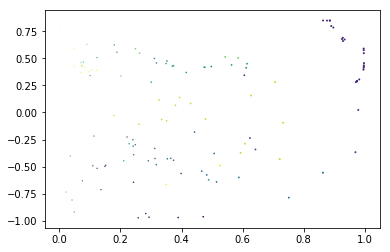

In [140]:
view_data = data_train.train_data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.
encoded_data, _ = autoencoder(view_data)
X = encoded_data.data[:, 0].numpy()
Y = encoded_data.data[:, 1].numpy()
plt.scatter(X, Y, X, c=data_train.train_labels[:200].numpy())
plt.show()

In [134]:
X.shape

(200,)

## DQN

In [142]:
"""
View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
More about Reinforcement learning: https://morvanzhou.github.io/tutorials/machine-learning/reinforcement-learning/

Dependencies:
torch: 0.4
gym: 0.8.1
numpy
"""
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import gym

# Hyper Parameters
BATCH_SIZE = 32
LR = 0.01                   # learning rate
EPSILON = 0.9               # greedy policy
GAMMA = 0.9                 # reward discount
TARGET_REPLACE_ITER = 100   # target update frequency
MEMORY_CAPACITY = 2000
env = gym.make('CartPole-v0')
env = env.unwrapped
N_ACTIONS = env.action_space.n
N_STATES = env.observation_space.shape[0]
ENV_A_SHAPE = 0 if isinstance(env.action_space.sample(), int) else env.action_space.sample().shape     # to confirm the shape


class Net(nn.Module):
    def __init__(self, ):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(N_STATES, 50)
        self.fc1.weight.data.normal_(0, 0.1)   # initialization
        self.out = nn.Linear(50, N_ACTIONS)
        self.out.weight.data.normal_(0, 0.1)   # initialization

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        actions_value = self.out(x)
        return actions_value


class DQN(object):
    def __init__(self):
        self.eval_net, self.target_net = Net(), Net()

        self.learn_step_counter = 0                                     # for target updating
        self.memory_counter = 0                                         # for storing memory
        self.memory = np.zeros((MEMORY_CAPACITY, N_STATES * 2 + 2))     # initialize memory
        self.optimizer = torch.optim.Adam(self.eval_net.parameters(), lr=LR)
        self.loss_func = nn.MSELoss()

    def choose_action(self, x):
        x = torch.unsqueeze(torch.FloatTensor(x), 0)
        # input only one sample
        if np.random.uniform() < EPSILON:   # greedy
            actions_value = self.eval_net.forward(x)
            action = torch.max(actions_value, 1)[1].data.numpy()
            action = action[0] if ENV_A_SHAPE == 0 else action.reshape(ENV_A_SHAPE)  # return the argmax index
        else:   # random
            action = np.random.randint(0, N_ACTIONS)
            action = action if ENV_A_SHAPE == 0 else action.reshape(ENV_A_SHAPE)
        return action

    def store_transition(self, s, a, r, s_):
        transition = np.hstack((s, [a, r], s_))
        # replace the old memory with new memory
        index = self.memory_counter % MEMORY_CAPACITY
        self.memory[index, :] = transition
        self.memory_counter += 1

    def learn(self):
        # target parameter update
        if self.learn_step_counter % TARGET_REPLACE_ITER == 0:
            self.target_net.load_state_dict(self.eval_net.state_dict())
        self.learn_step_counter += 1

        # sample batch transitions
        sample_index = np.random.choice(MEMORY_CAPACITY, BATCH_SIZE)
        b_memory = self.memory[sample_index, :]
        b_s = torch.FloatTensor(b_memory[:, :N_STATES])
        b_a = torch.LongTensor(b_memory[:, N_STATES:N_STATES+1].astype(int))
        b_r = torch.FloatTensor(b_memory[:, N_STATES+1:N_STATES+2])
        b_s_ = torch.FloatTensor(b_memory[:, -N_STATES:])

        # q_eval w.r.t the action in experience
        q_eval = self.eval_net(b_s).gather(1, b_a)  # shape (batch, 1)
        q_next = self.target_net(b_s_).detach()     # detach from graph, don't backpropagate
        q_target = b_r + GAMMA * q_next.max(1)[0].view(BATCH_SIZE, 1)   # shape (batch, 1)
        loss = self.loss_func(q_eval, q_target)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

dqn = DQN()

print('\nCollecting experience...')
for i_episode in range(400):
    s = env.reset()
    ep_r = 0
    while True:
        env.render()
        a = dqn.choose_action(s)

        # take action
        s_, r, done, info = env.step(a)

        # modify the reward
        x, x_dot, theta, theta_dot = s_
        r1 = (env.x_threshold - abs(x)) / env.x_threshold - 0.8
        r2 = (env.theta_threshold_radians - abs(theta)) / env.theta_threshold_radians - 0.5
        r = r1 + r2

        dqn.store_transition(s, a, r, s_)

        ep_r += r
        if dqn.memory_counter > MEMORY_CAPACITY:
            dqn.learn()
            if done:
                print('Ep: ', i_episode,
                      '| Ep_r: ', round(ep_r, 2))

        if done:
            break
        s = s_

ModuleNotFoundError: No module named 'gym'

## GAN

In [203]:
LR_G = 0.0001
LR_D = 0.0001
BATCH_SIZE = 64
FEATURE = 15
N_IDEAS = 5   # how to transform the ideas into art piece
FEATURES = 15 # art components

In [204]:
G = nn.Sequential(nn.Linear(N_IDEAS, 128),
                 nn.ReLU(),
                 nn.Linear(128, FEATURES) )
D = nn.Sequential(nn.Linear(FEATURES, 128),
                 nn.ReLU(),
                 nn.Linear(128, 1),
                 nn.Sigmoid())

In [205]:
points = np.vstack([np.linspace(-2, 2, FEATURES) for _ in range(BATCH_SIZE)])
def art_work():
    a = np.random.uniform(1, 2, BATCH_SIZE)[:, np.newaxis]
    y = a * np.power(points, 2) + a - 1
    artwork = torch.from_numpy(y).float()
    return artwork

In [206]:
D_optimizer = torch.optim.Adam(D.parameters(), lr=LR_D)
G_optimizer = torch.optim.Adam(G.parameters(), lr=LR_G)

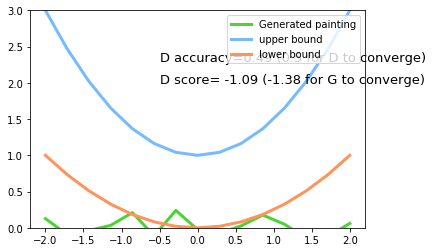

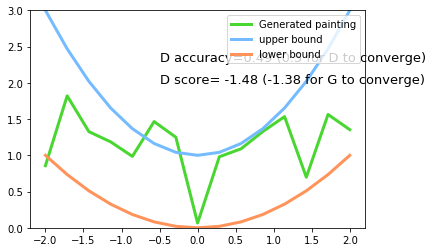

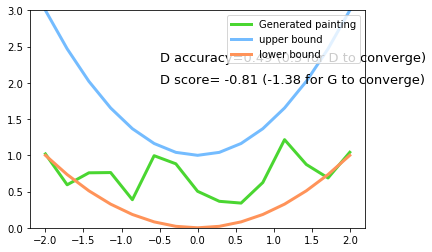

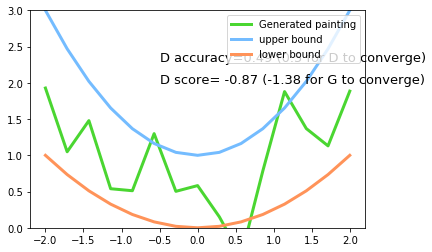

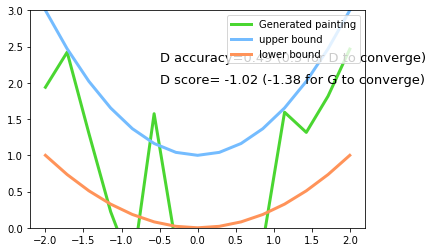

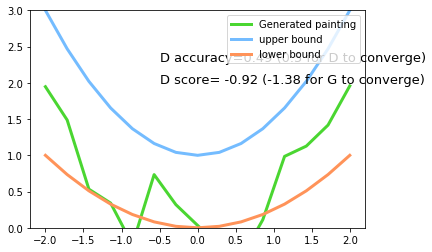

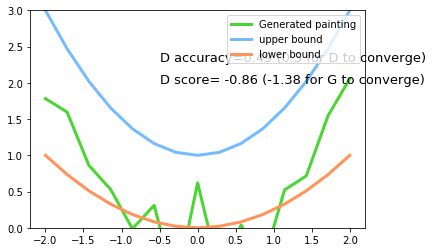

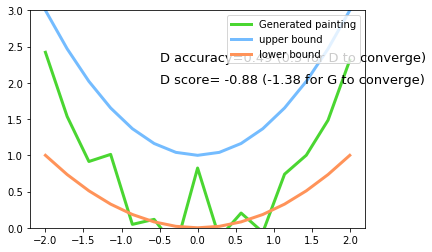

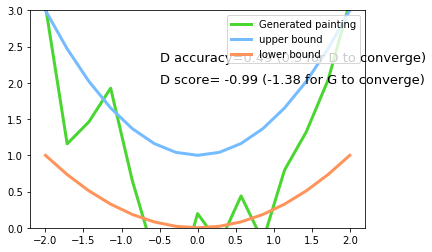

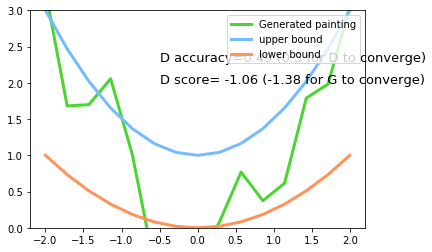

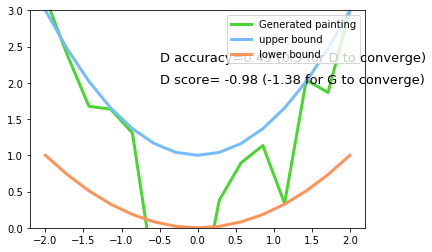

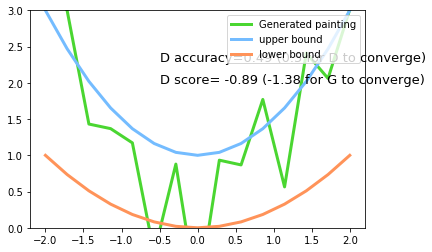

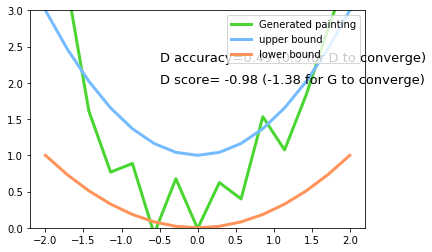

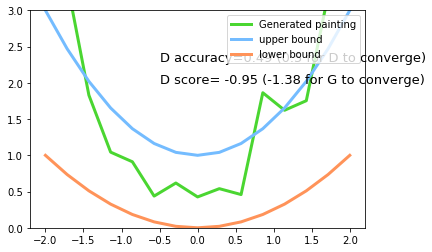

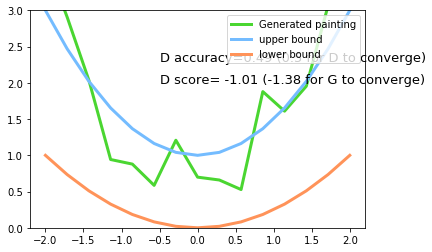

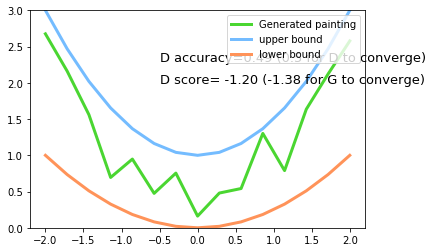

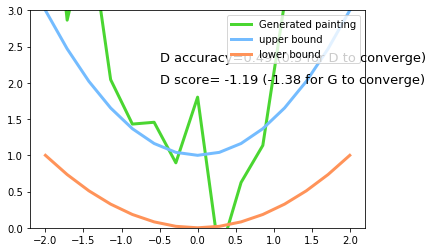

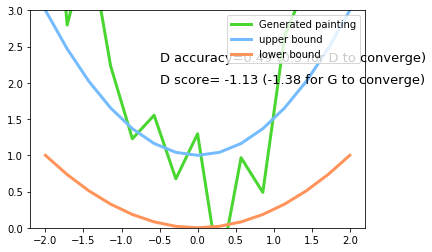

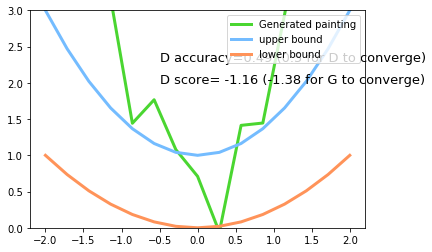

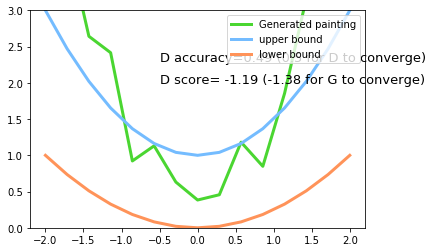

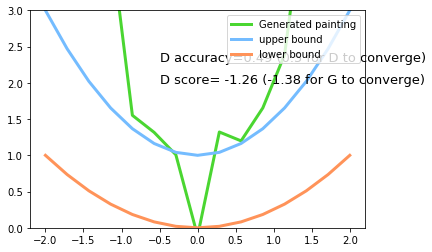

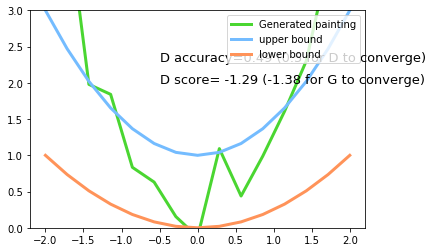

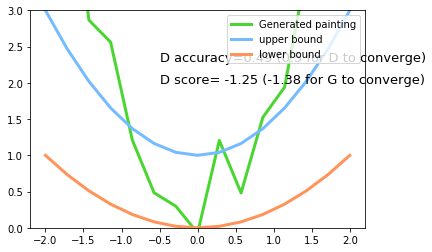

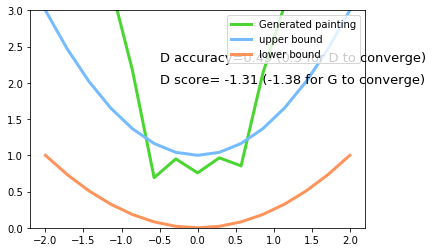

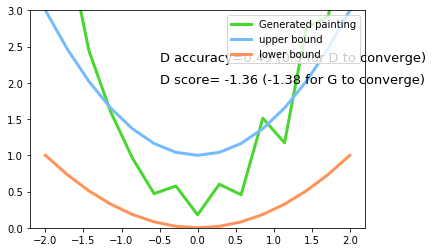

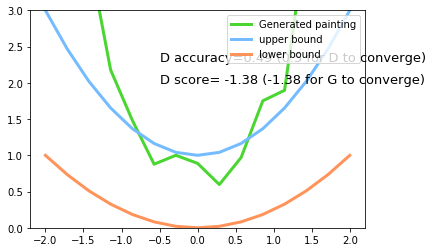

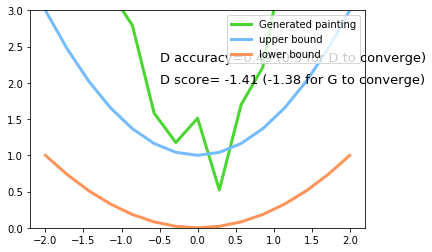

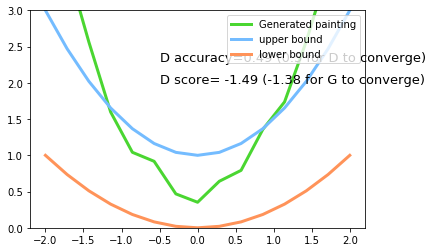

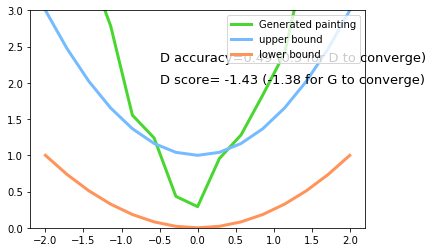

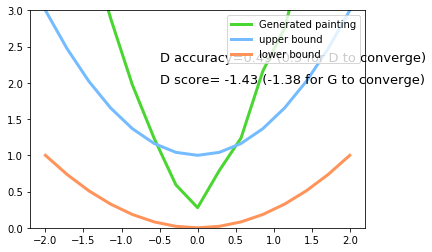

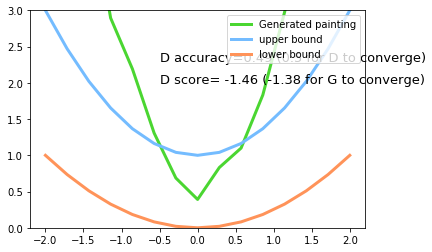

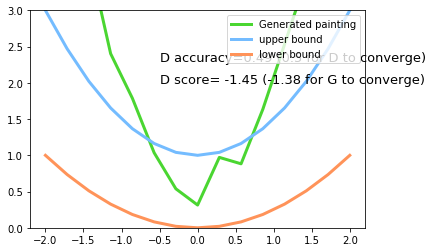

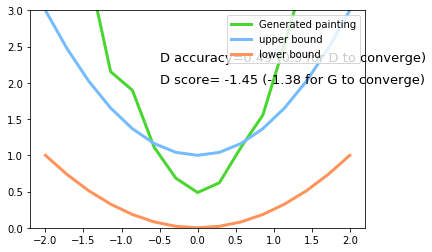

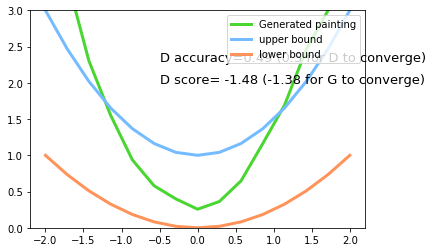

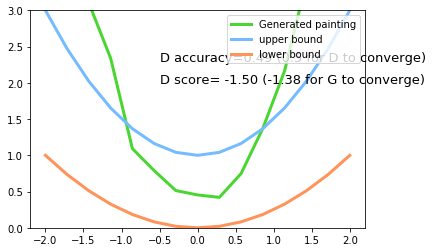

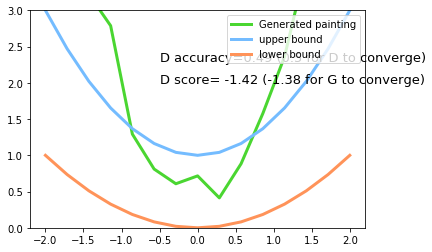

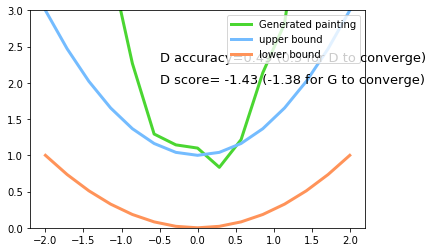

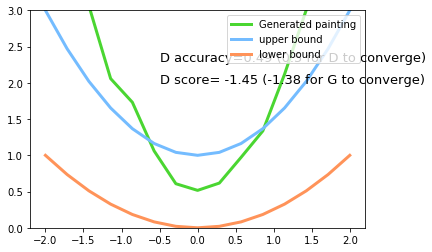

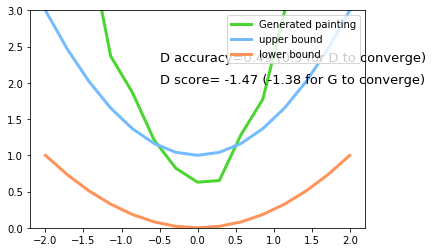

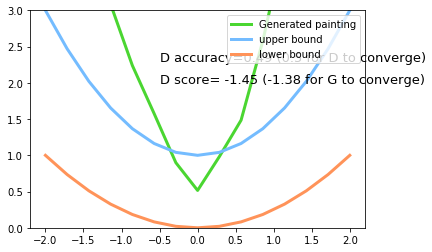

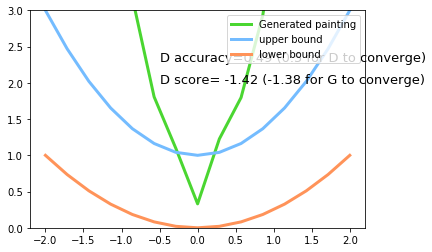

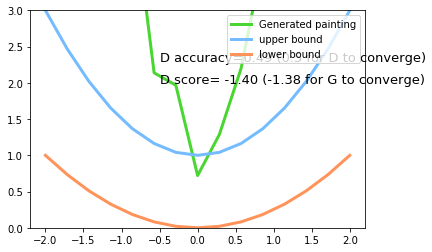

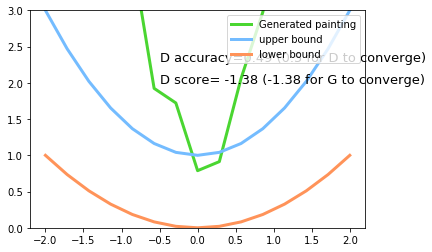

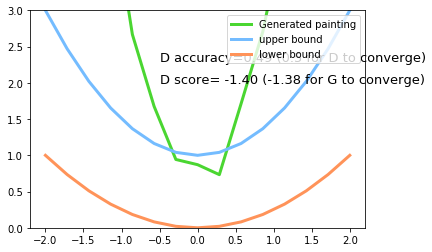

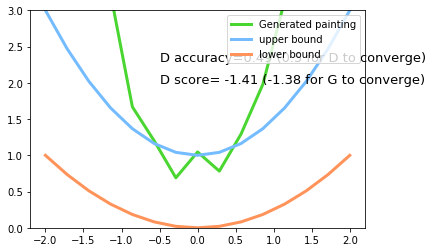

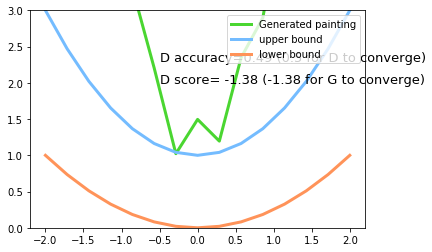

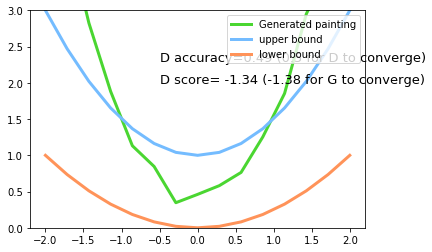

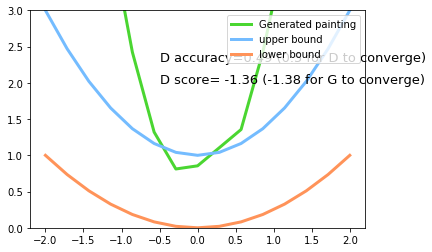

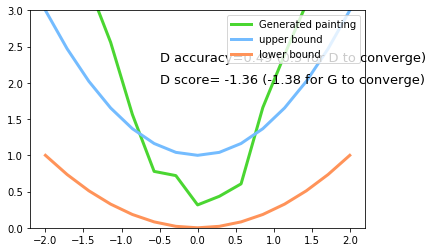

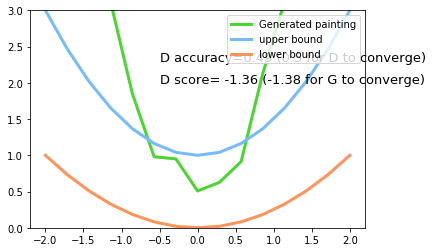

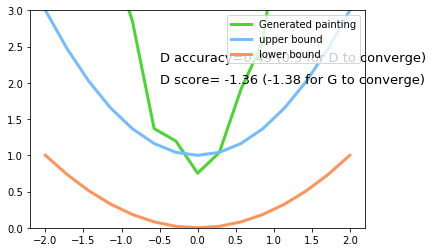

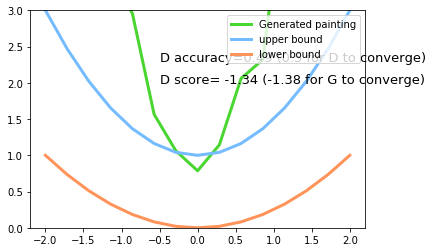

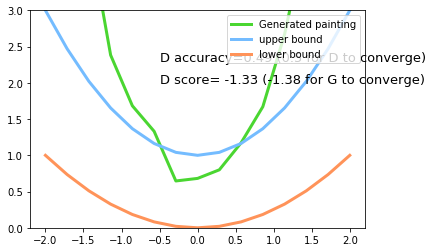

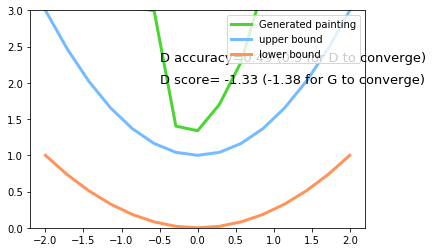

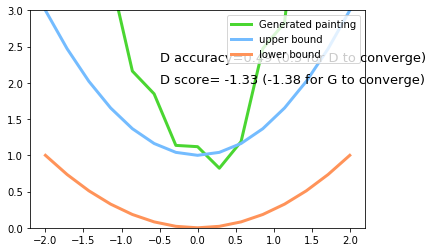

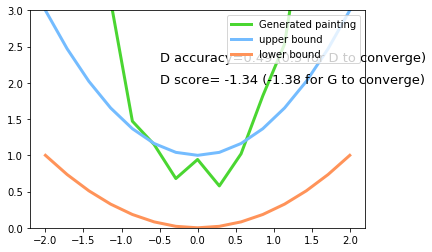

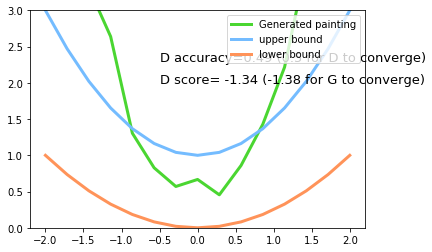

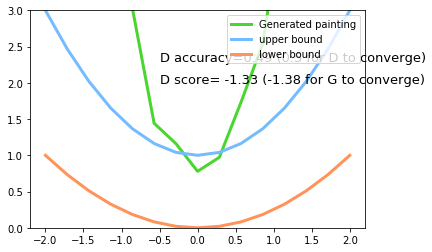

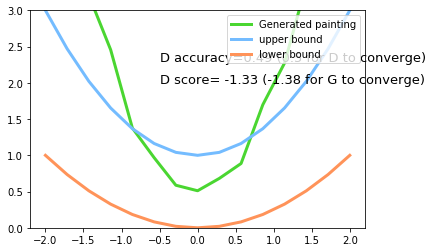

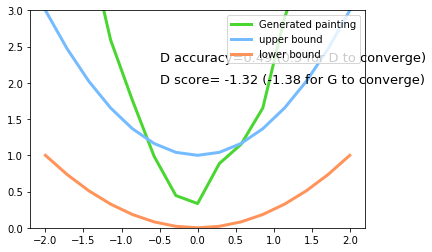

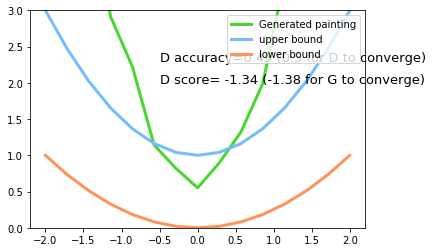

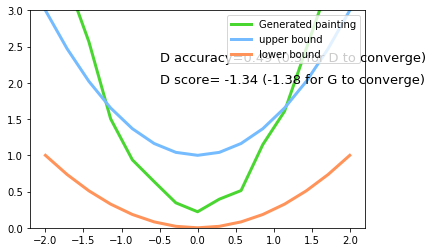

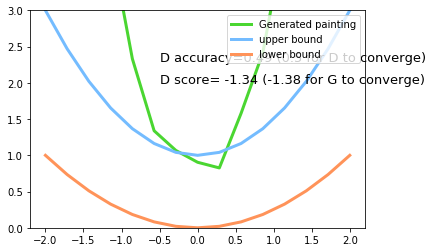

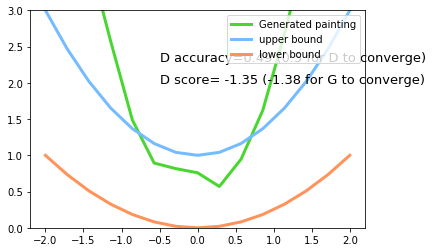

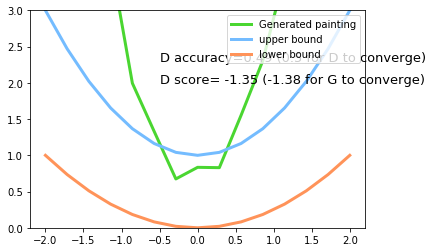

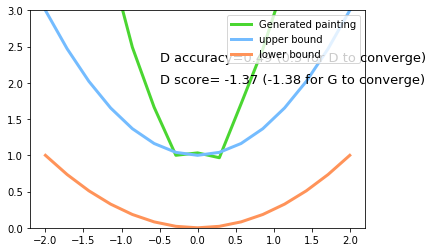

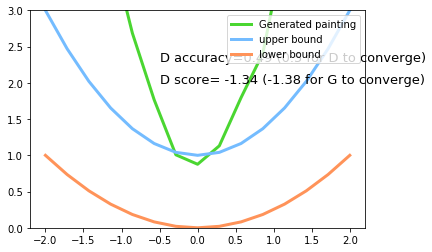

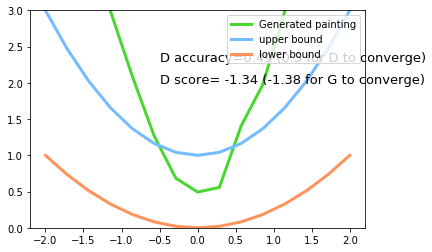

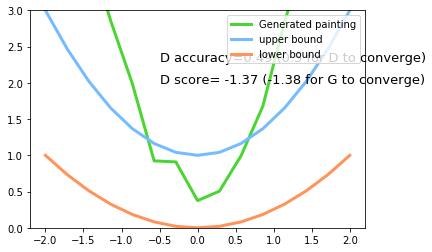

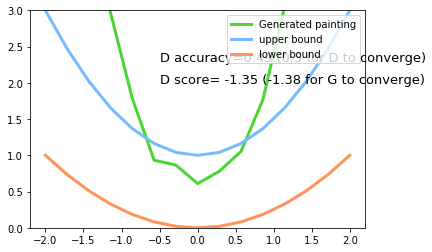

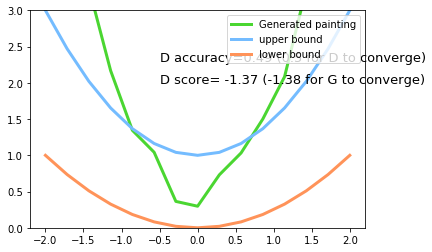

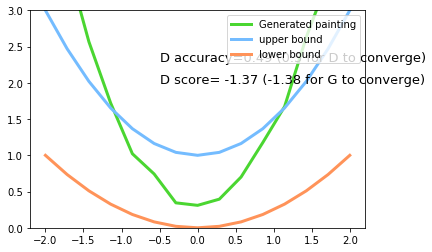

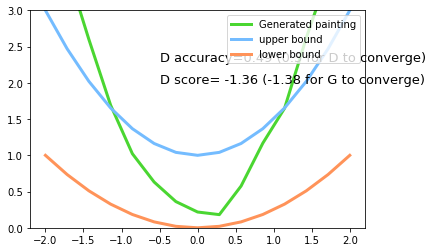

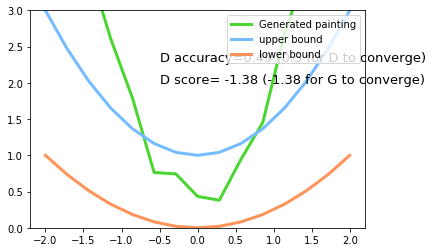

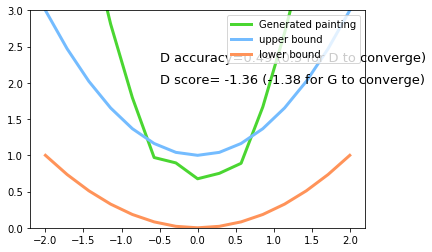

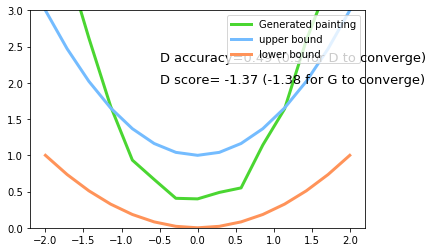

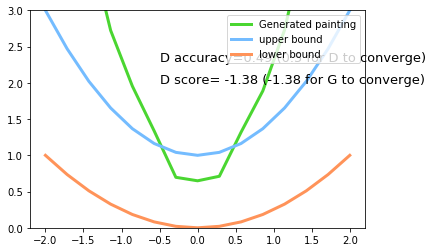

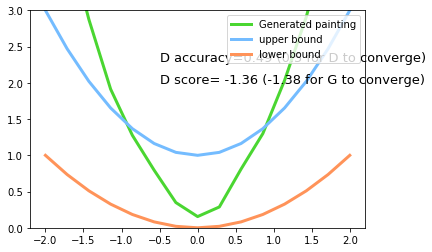

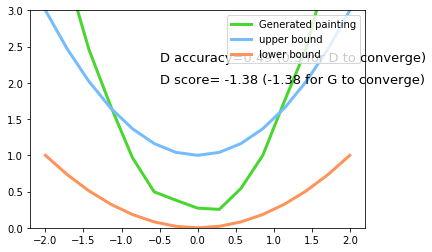

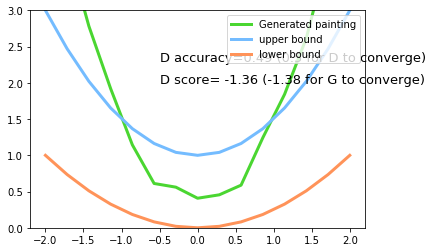

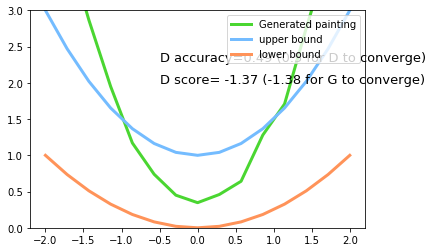

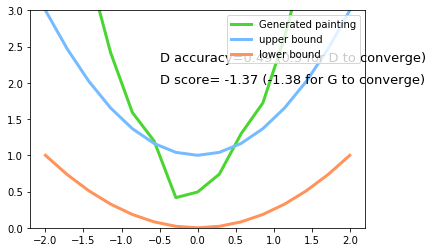

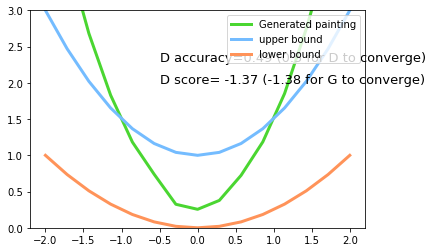

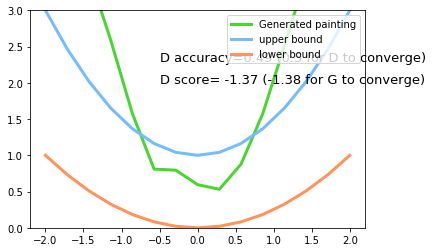

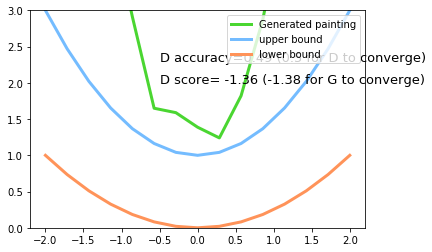

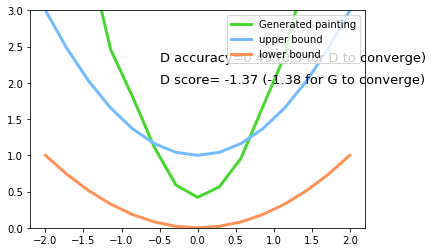

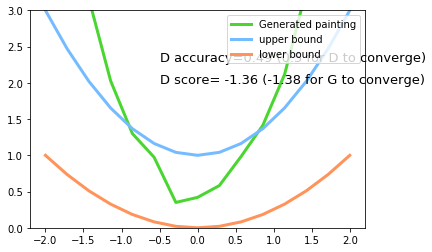

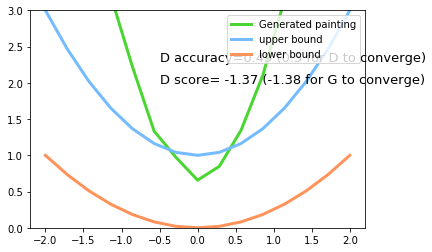

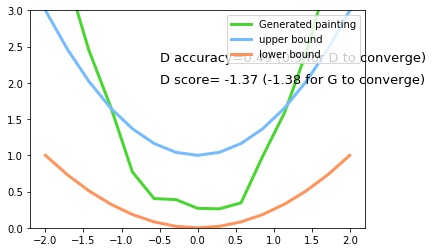

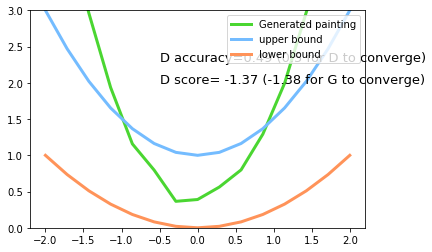

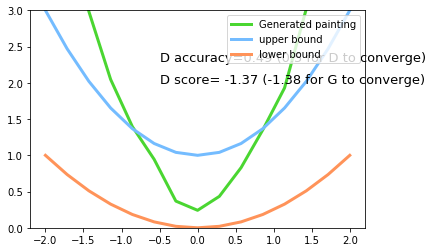

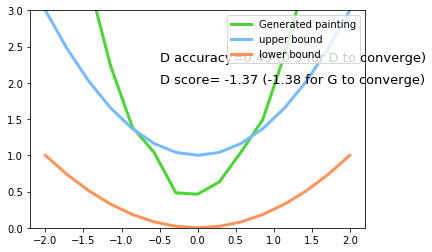

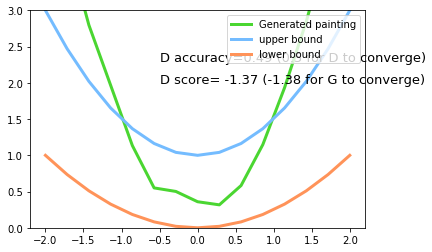

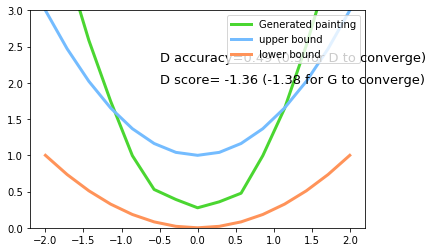

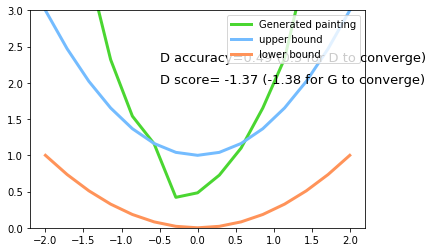

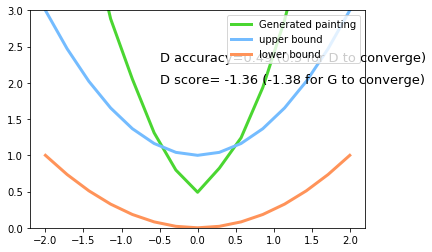

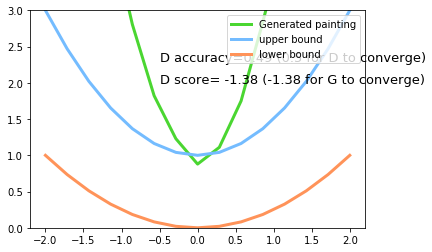

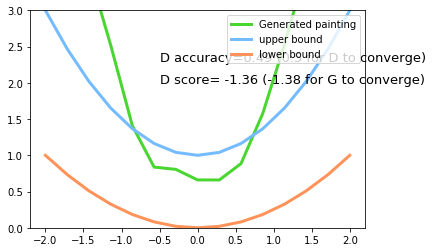

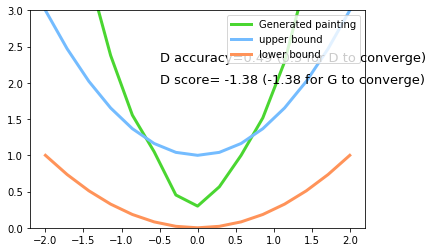

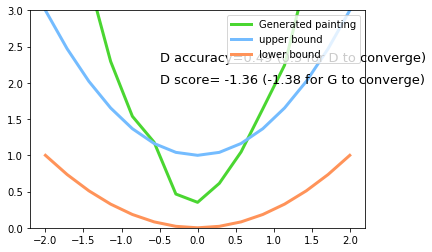

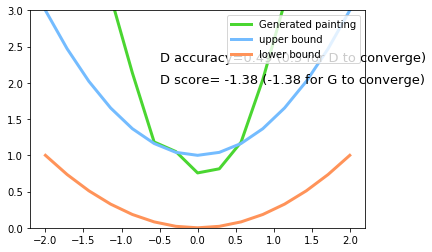

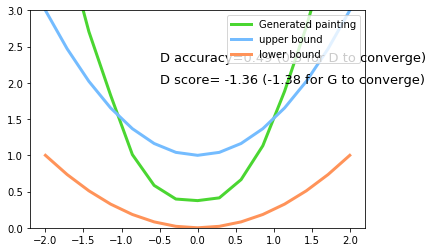

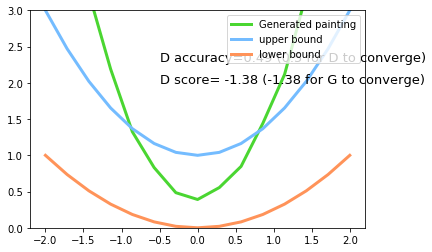

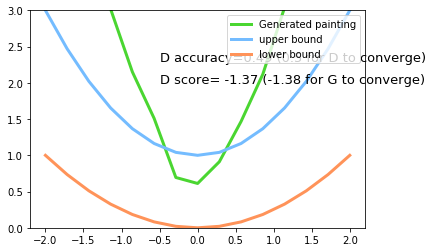

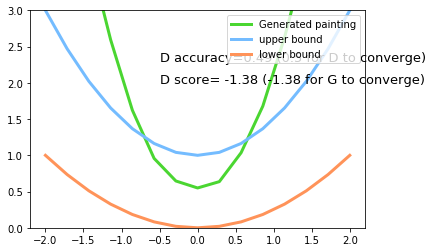

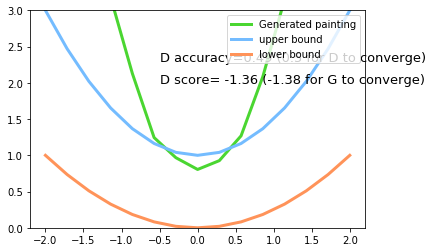

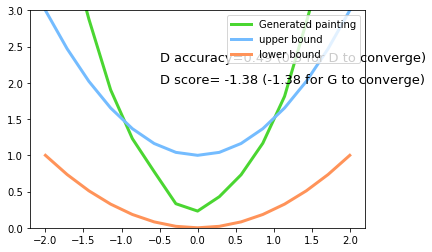

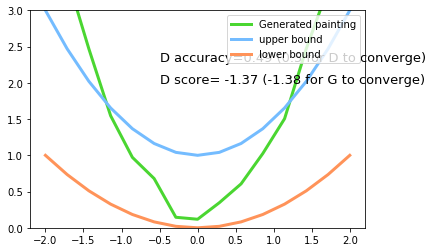

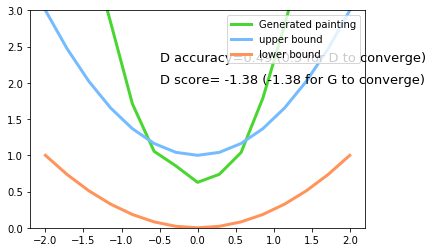

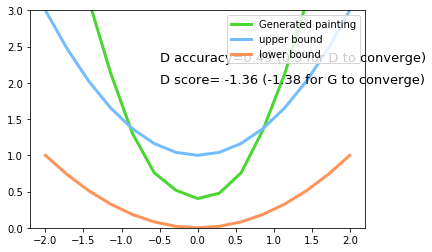

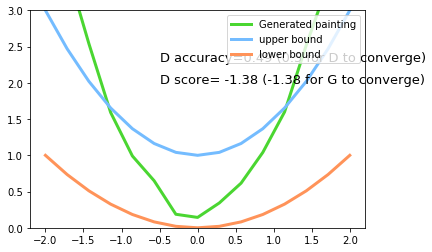

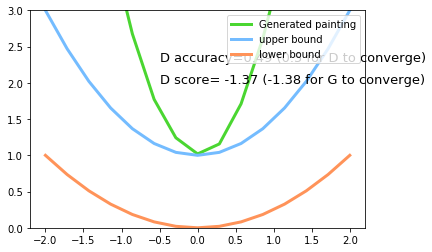

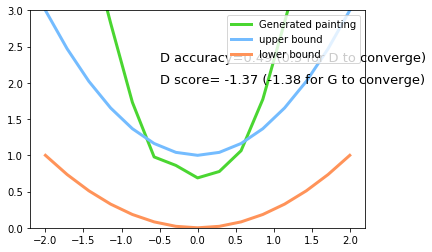

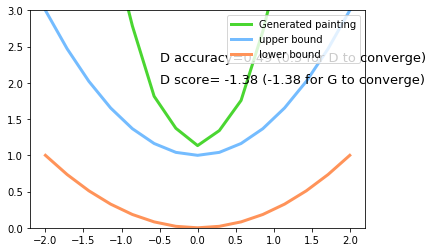

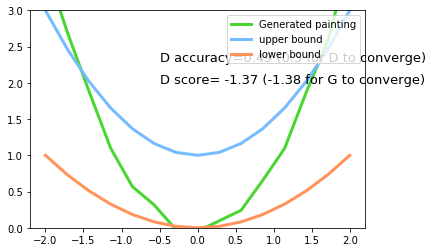

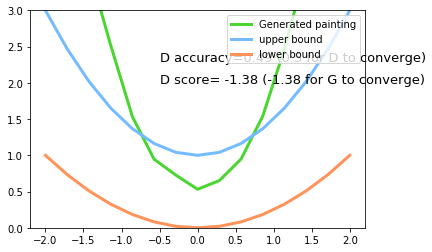

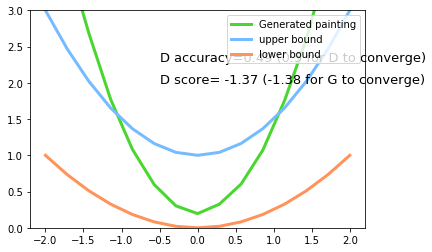

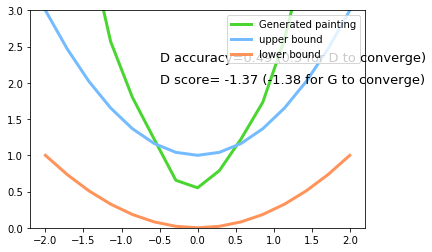

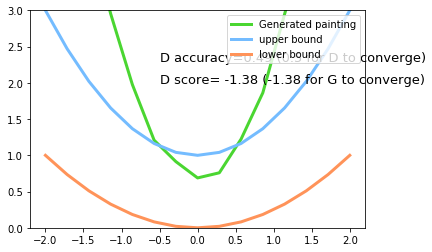

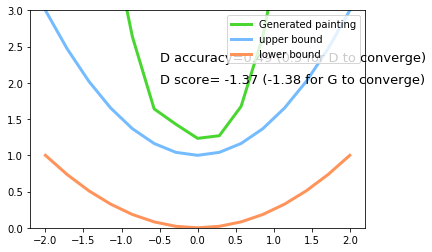

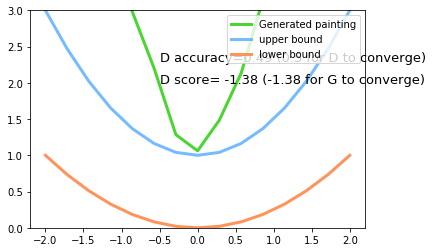

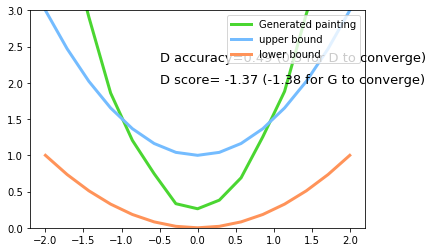

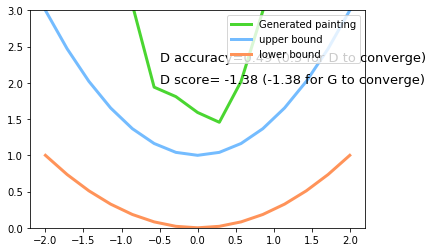

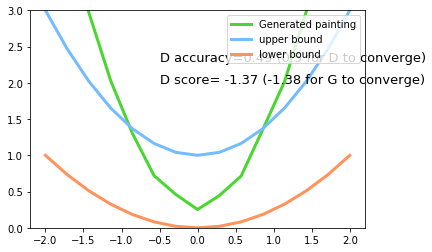

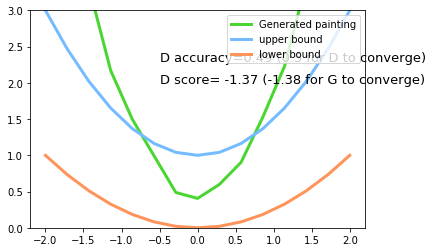

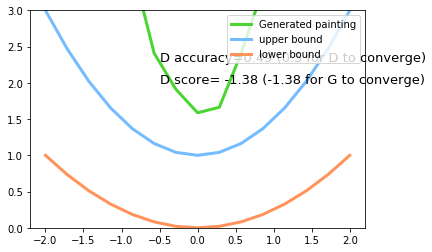

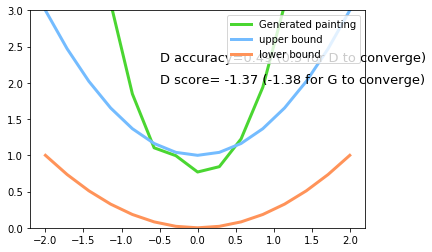

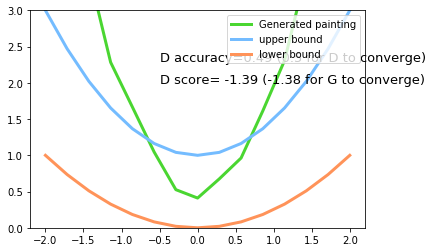

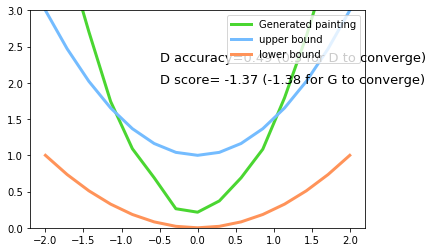

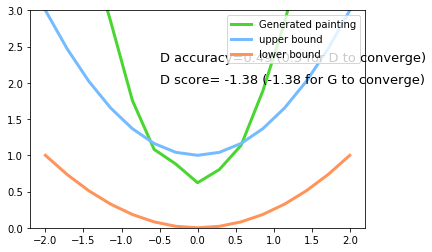

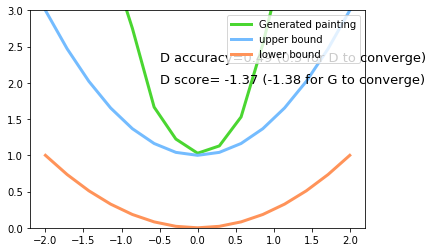

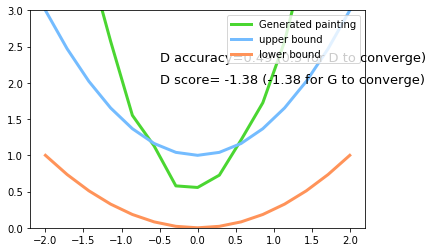

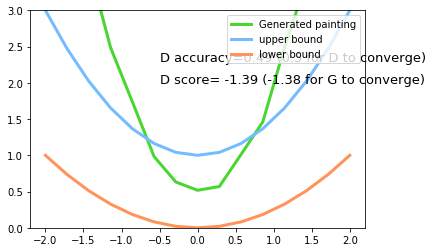

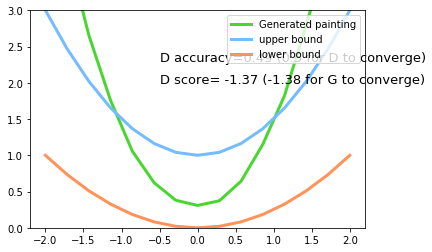

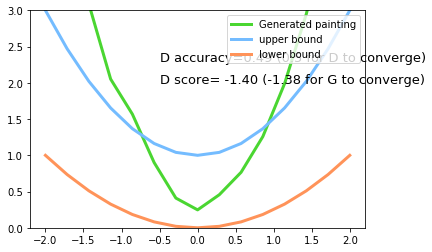

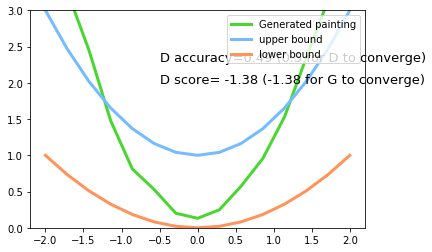

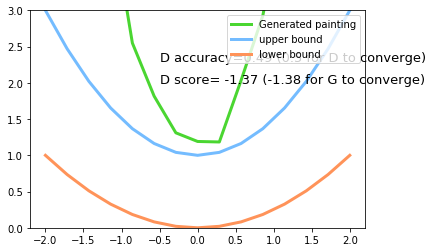

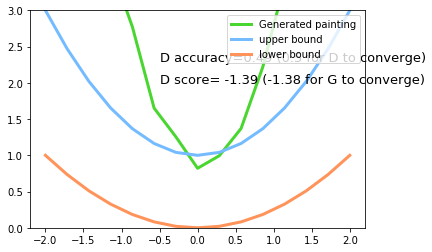

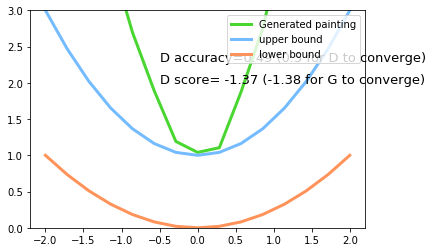

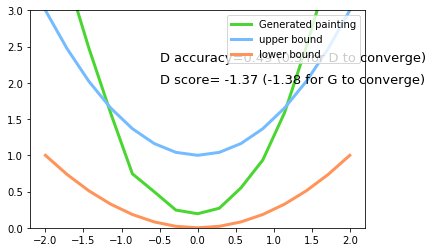

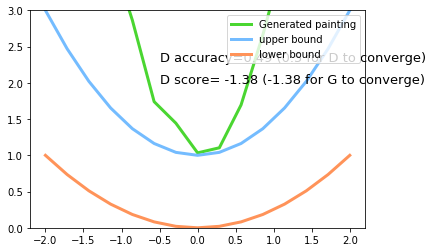

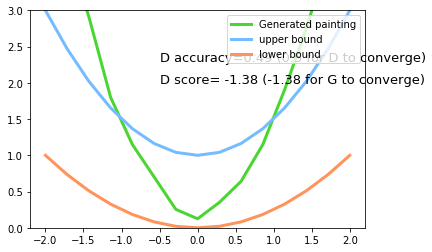

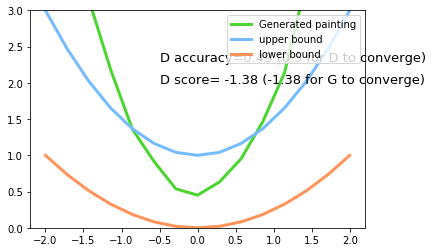

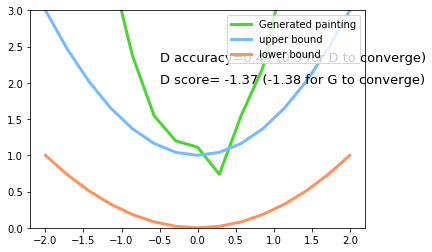

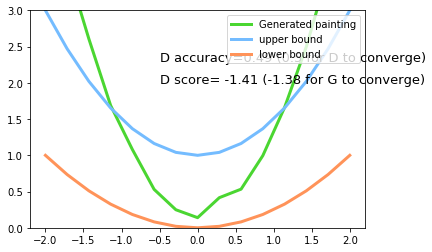

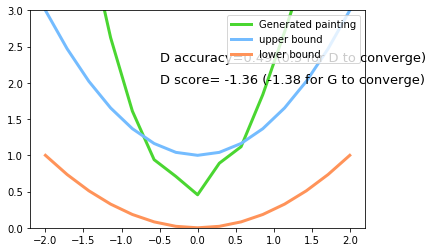

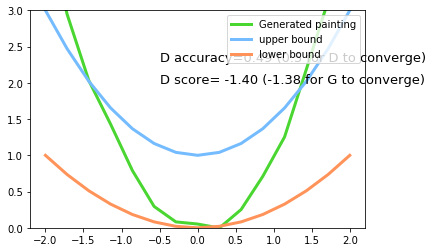

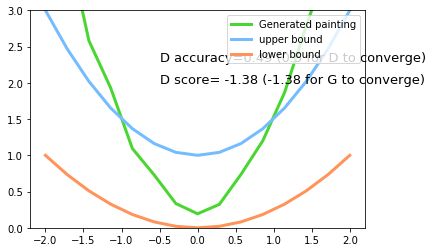

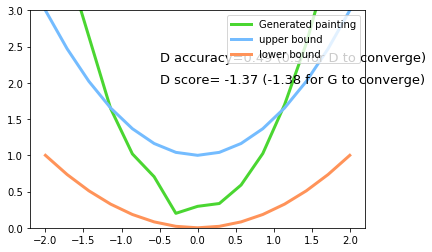

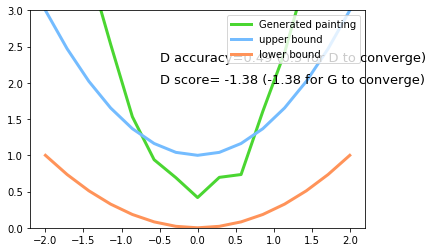

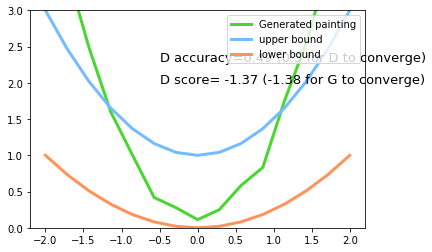

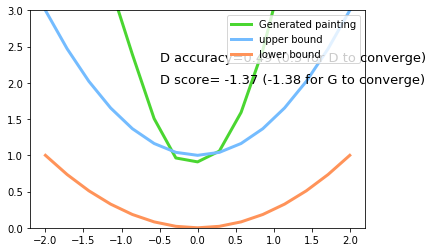

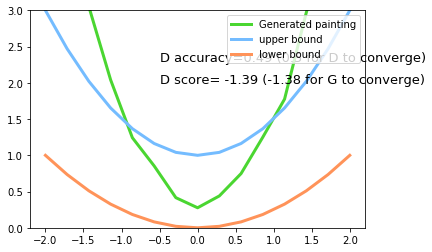

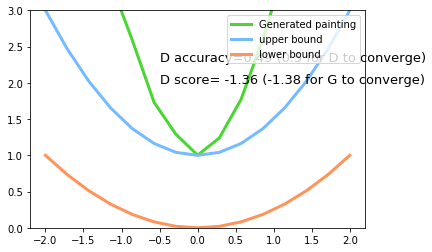

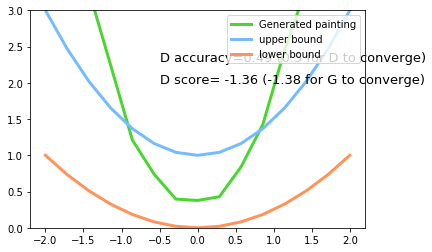

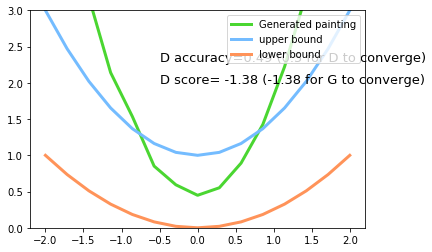

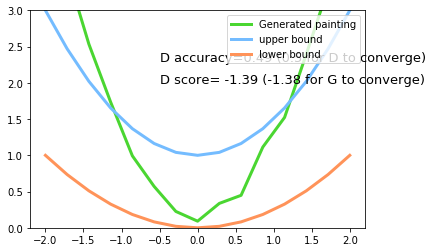

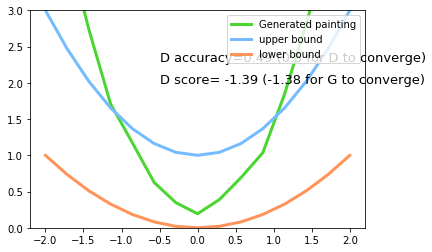

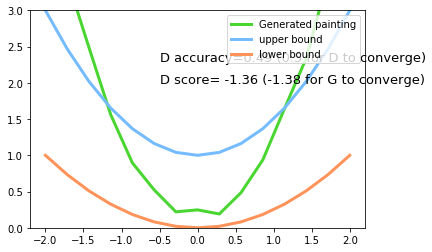

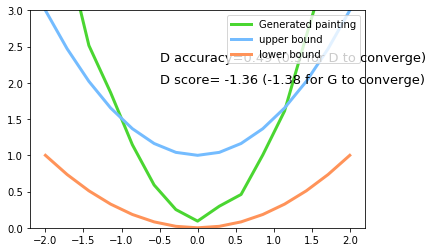

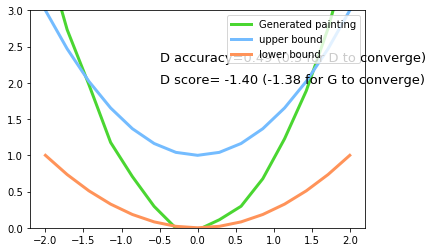

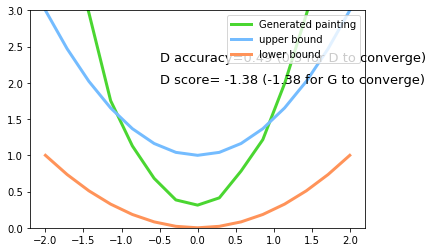

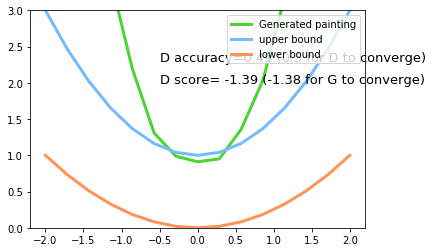

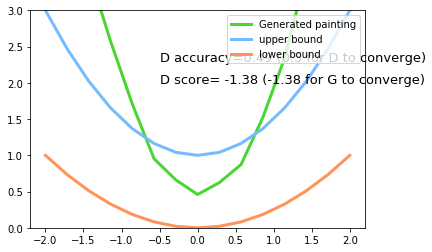

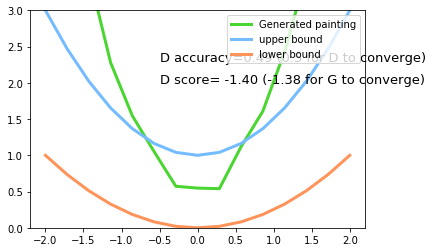

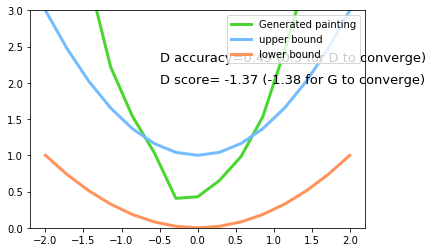

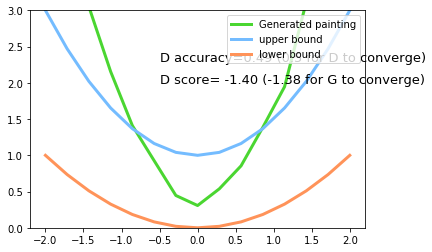

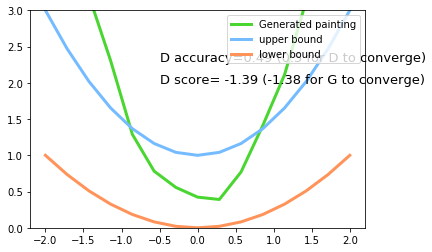

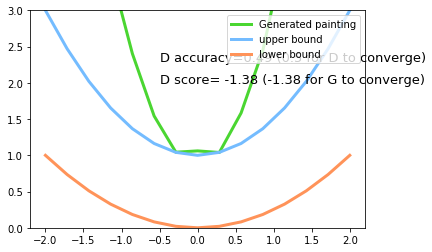

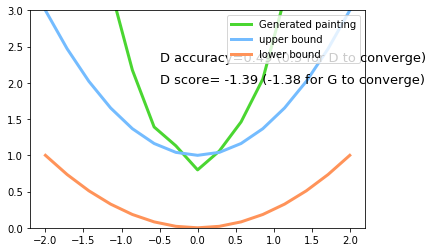

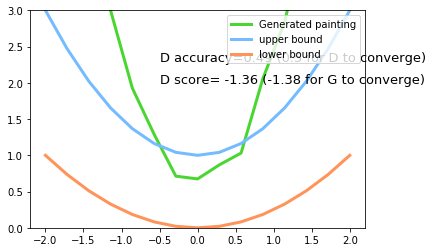

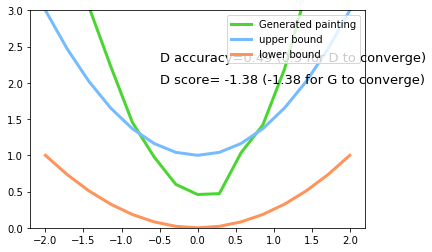

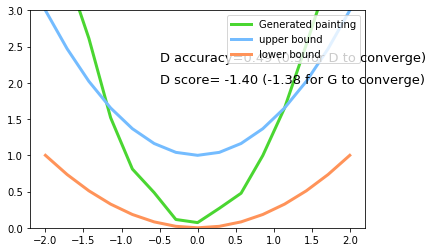

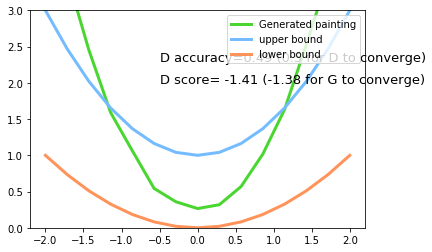

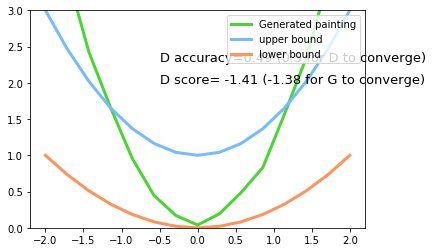

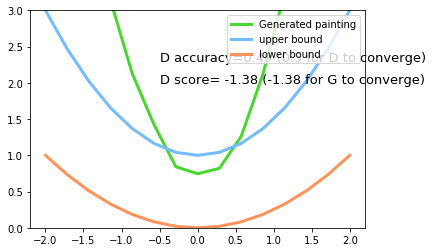

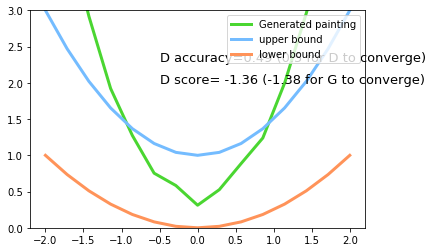

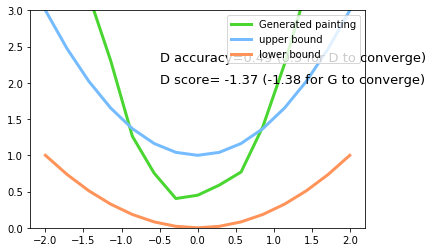

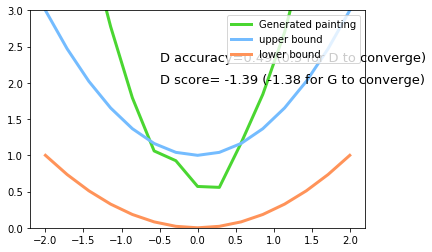

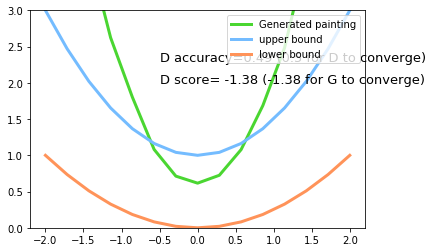

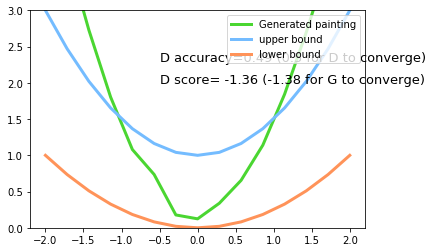

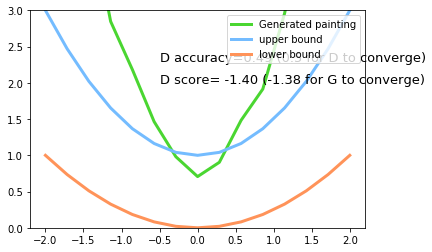

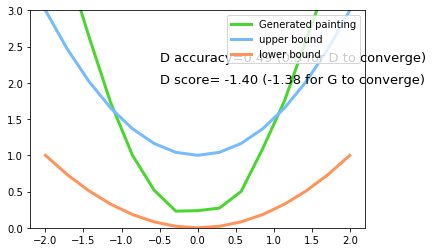

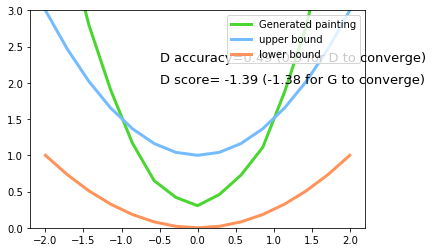

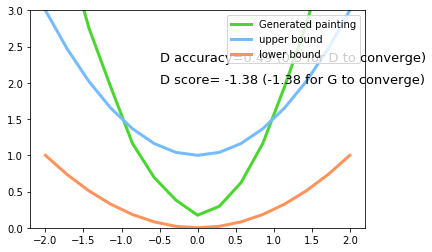

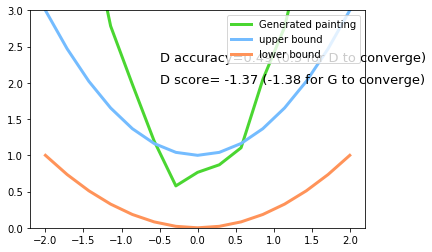

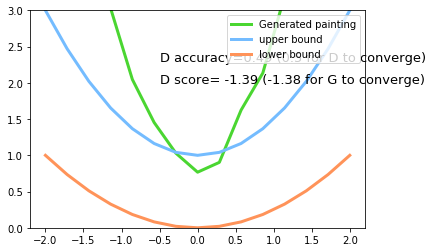

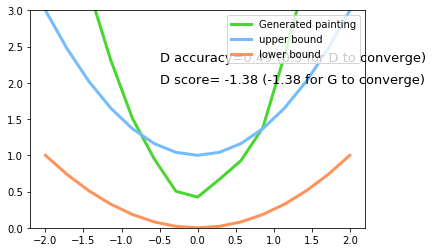

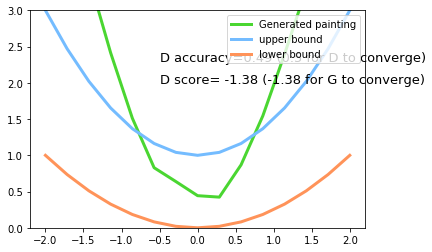

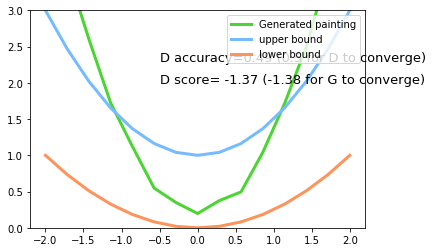

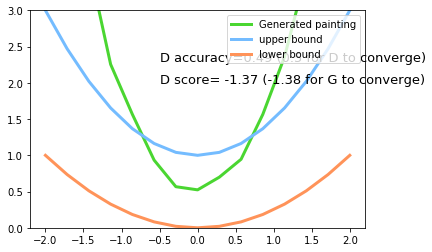

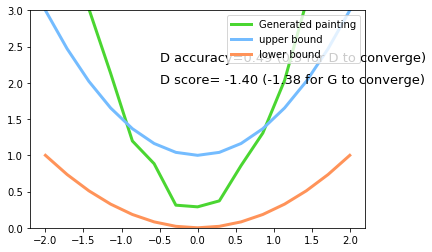

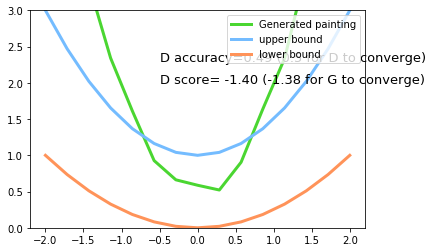

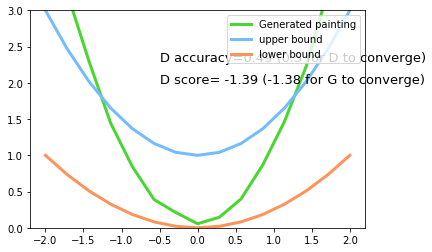

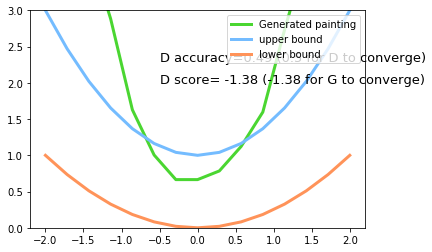

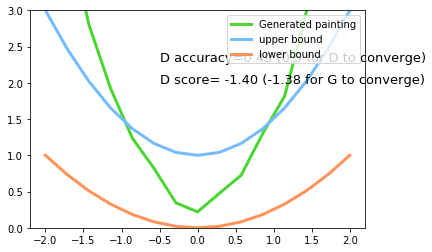

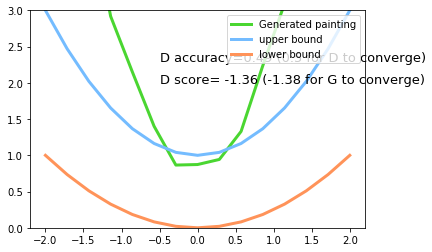

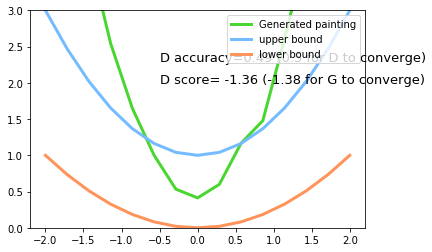

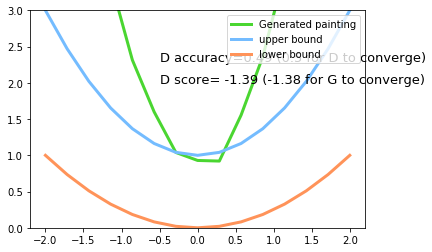

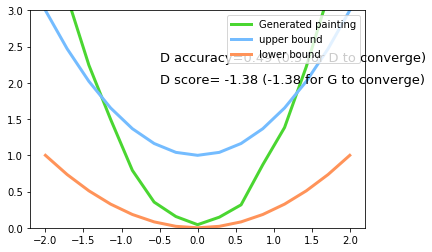

In [209]:
plt.ion()
for step in range(10000):
    artwork = art_work()
    ideas = torch.randn(BATCH_SIZE, N_IDEAS) # this is a variable that can be fixed
    G_work = G(ideas)
    
    art_work_prob = D(artwork)
    G_work_prob = D(G_work)

    
    D_loss = - torch.mean(torch.log(art_work_prob) + torch.log(1. - G_work_prob))
    G_loss = torch.mean(torch.log(1. - G_work_prob))

    ## you need to update D first all at once and then update G, instead of update all of them at the same time
    D_optimizer.zero_grad()
    D_loss.backward(retain_graph=True)      # reusing computational graph
    D_optimizer.step()

    G_optimizer.zero_grad()
    G_loss.backward()
    G_optimizer.step()
    if step % 50 == 0:  # plotting
        plt.cla()
        plt.plot(points[0], G_work.data.numpy()[0], c='#4AD631', lw=3, label='Generated painting',)
        plt.plot(points[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
        plt.plot(points[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
        plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % prob_artist0.data.numpy().mean(), fontdict={'size': 13})
        plt.text(-.5, 2, 'D score= %.2f (-1.38 for G to converge)' % -D_loss.data.numpy(), fontdict={'size': 13})
        plt.ylim((0, 3));plt.legend(loc='upper right', fontsize=10);plt.draw();plt.pause(0.01)

plt.ioff()
plt.show()

### RNN is dynamic

## Batch Normalization

## Dropout